https://github.com/lsjsj92/keras_basic/blob/master/7.%20predict_multi_img_with_CNN.ipynb

https://lsjsj92.tistory.com/355


1. 라벨링 # 함
2. 파일 열기 #함
3. 픽셀값으로 변경 # 함
4. train, validation 비율 자유 #
5. 컨벌루젼 최대 4개, dense 최대 2개 # 이거 모르겠음
6. max pooling, dropout 필수 # 함
7. 손실함수 : categorical_crossentropy # 함
8. early_stopping # 함
9. test 데이터 사용해서 예측값과 실제값 비교 시각화 # 해야함
sklearn - confusion_matrix
seaborn -  heatmap


옵션

성능 향상을 위해, data augmentation 기법 적용 가능
예: rotation [1], jigsaw puzzle [2], colorization [3], and inpainting [4]





In [173]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import load_model

from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


from google.colab import drive



라벨링, 파일 불러오기기, 픽셀값 변경경

In [174]:
drive.mount('/content/drive')
caltech_dir = './drive/MyDrive/Colab Notebooks/data/train'

categories = ["adidas", "converse", "nike"]

#caltech_dir = "./multi_img_data/imgs_others/train"

nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))




    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X) #데이터 쌓기
y = np.array(y) # 라벨링 쌓기


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
print("ok", len(y))

##########################################

drive.mount('/content/drive')
caltech_dir = './drive/MyDrive/Colab Notebooks/data/test'

categories = ["adidas", "converse", "nike"]

#caltech_dir = "./multi_img_data/imgs_others/train"

nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X1 = []
y1 = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))




    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X1.append(data)
        y1.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)


X_test2 = np.array(X1)
y_test2 = np.array(y1)


# xy = (X_train, X_test, y_train, y_test)
# np.save("./drive/MyDrive/Colab Notebooks/data/multi_image_data.npy", xy)

print("ok", len(y_test2))

# X_train, X_test, y_train, y_test = np.load('./drive/MyDrive/Colab Notebooks/data/multi_image_data.npy')
#print(X_train)
#print(X_train.shape[0])


# plt.imshow(files[1])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
adidas  파일 길이 :  237
adidas  :  ./drive/MyDrive/Colab Notebooks/data/train/adidas/168.jpg
converse  파일 길이 :  237
converse  :  ./drive/MyDrive/Colab Notebooks/data/train/converse/189.jpg
nike  파일 길이 :  237
nike  :  ./drive/MyDrive/Colab Notebooks/data/train/nike/129.jpg
ok 711
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
adidas  파일 길이 :  38
adidas  :  ./drive/MyDrive/Colab Notebooks/data/test/adidas/18.jpg
converse  파일 길이 :  38
converse  :  ./drive/MyDrive/Colab Notebooks/data/test/converse/32.jpg
nike  파일 길이 :  38
nike  :  ./drive/MyDrive/Colab Notebooks/data/test/nike/4.jpg
ok 114


In [175]:
# print(X_test2)

In [176]:
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

X_test2 = X_test2.astype(float) / 255


In [177]:
# print(X_test2)

In [178]:

model = Sequential()
model.add(Conv2D(16, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu')) # 커널의 개수 32개, 커널의 크기 3*3, 입력의 크기 : 행, 열, 흑백 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten()) # 1차원 백터로 변경경
model.add(Dense(512, activation='relu')) # dense 1
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax')) # dense 2

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 손실함수 : categorical_crossentropy, 옵티마이저 : 아담, 메트릭스 

model_dir = './drive/MyDrive/Colab Notebooks/data'

model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=0, save_best_only=True)




early_stopping = EarlyStopping(monitor='val_loss', patience=10) # 얼리 스타핑핑

model.summary() #썸머리 

history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_split= 0.25, callbacks=[checkpoint, early_stopping])

# validation_data=(X_test, y_test)




Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 240, 240, 16)      448       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 120, 120, 16)     0         
 g2D)                                                            
                                                                 
 dropout_80 (Dropout)        (None, 120, 120, 16)      0         
                                                                 
 conv2d_61 (Conv2D)          (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 dropout_81 (Dropout)        (None, 60, 60, 32)      

43/43 [==============================] - 4s 72ms/step - loss: 2.1300 - accuracy: 0.3028 - val_loss: 1.0998 - val_accuracy: 0.2676
Epoch 2/50
42/43 [============================>.] - ETA: 0s - loss: 1.0986 - accuracy: 0.3429

43/43 [==============================] - 3s 73ms/step - loss: 1.0984 - accuracy: 0.3451 - val_loss: 1.0996 - val_accuracy: 0.3873
Epoch 3/50
42/43 [============================>.] - ETA: 0s - loss: 1.0963 - accuracy: 0.3381

43/43 [==============================] - 3s 61ms/step - loss: 1.0963 - accuracy: 0.3380 - val_loss: 1.0989 - val_accuracy: 0.3451
Epoch 4/50
41/43 [===========================>..] - ETA: 0s - loss: 1.0844 - accuracy: 0.4049

43/43 [==============================] - 3s 67ms/step - loss: 1.0834 - accuracy: 0.4108 - val_loss: 1.0976 - val_accuracy: 0.3521
Epoch 5/50
42/43 [============================>.] - ETA: 0s - loss: 1.0458 - accuracy: 0.4452

43/43 [==============================] - 3s 67ms/step - loss: 1.0460 - accuracy: 0.4437 - val_loss: 1.0821 - val_accuracy: 0.4437
Epoch 6/50
42/43 [============================>.] - ETA: 0s - loss: 0.9543 - accuracy: 0.5286

43/43 [==============================] - 3s 60ms/step - loss: 0.9525 - accuracy: 0.5305 - val_loss: 1.0725 - val_accuracy: 0.4577
Epoch 7/50
43/43 [==============================] - 1s 21ms/step - loss: 0.8378 - accuracy: 0.6244 - val_loss: 1.1019 - val_accuracy: 0.4648
Epoch 8/50
43/43 [==============================] - 1s 20ms/step - loss: 0.7090 - accuracy: 0.6901 - val_loss: 1.3458 - val_accuracy: 0.3803
Epoch 9/50
43/43 [==============================] - 1s 19ms/step - loss: 0.6059 - accuracy: 0.7113 - val_loss: 1.2739 - val_accuracy: 0.4225
Epoch 10/50
43/43 [==============================] - 1s 20ms/step - loss: 0.5254 - accuracy: 0.7559 - val_loss: 1.3529 - val_accuracy: 0.4155
Epoch 11/50
43/43 [==============================] - 1s 20ms/step - loss: 0.4644 - accuracy: 0.7864 - val_loss: 1.4522 - val_accuracy: 0.4718
Epoch 12/50
43/43 [==============================] - 1s 20ms/step - loss: 0.3997 - accuracy: 0.8146 - val_loss: 1.5742 - val_accuracy: 0.4718
Epoch 13/50
43/43 [==

In [179]:
# score = model.evaluate(X_test2,y_test2)
# print(score)

# print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

In [180]:

real_prices = []
pred_prices = []
X_num = []
n_iter=0

filenames = []

Y_prediction = model.predict(X_test2)

# print(Y_prediction) 


for i in range(len(X_test2)):
  real = y_test[i]
  prediction = Y_prediction[i]
  # print('Real price : {}, Expected price : {}'.format(real,prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter +1
  X_num.append(n_iter)

# print(type(real_prices))
# print(type(pred_prices))

# print(real_prices)
# print(pred_prices)


# confusion_matrix(real_prices, pred_prices)



4/4 [==============================] - 0s 19ms/step


In [181]:
# print(pred_prices)

In [182]:
pred = []

for i in pred_prices:
  if(i.argmax()== 0):
    pred.append(0)
  elif(i.argmax()== 1):
    pred.append(1)
  elif(i.argmax()== 2):
    pred.append(2)

Y_test = []

for i in y_test2:
  if(i.argmax()== 0):
    Y_test.append(0)
  elif(i.argmax()== 1):
    Y_test.append(1)
  elif(i.argmax()== 2):
    Y_test.append(2)



In [183]:
test = confusion_matrix(Y_test, pred)

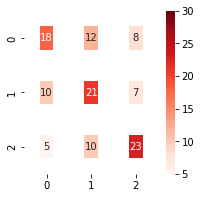

In [189]:
plt.figure(figsize = (3, 3))
plt.ylabel('True')
plt.xlabel('Predict')
sns.heatmap(test, linewidth = 30, vmax = 30, cmap = 'Reds', annot = True)


plt.show()
